**Author: Keita Eriawan** <br>
**Date: 04/30/2020** <br>
**Dataset: __[Pokemon Dataset](https://www.kaggle.com/abcsds/pokemon)__**<br>
**Pokemon Dataset Exploration Analysis**

---

**Context of the Project** <br> <br> As a child, I have been a huge fan of all Pokemon games starting from Pokemon Crystal to the latest Pokemon OmegaRuby that I am current playing right now. Although I never played Pokemon in a professional setting, it is one of the game that I can enjoy for my whole life.

As there is a lot of Pokemon, it is hard for beginners to know which one is the best Pokemon but there are a lot of factors that we need to consider: Types Advantages, Types Weakness, Base Stats, etc. **Some might ask which Pokemon has the highest HP, Speed or which type is the most common in each generation.**

As I am currently pursuing my Master's in Business Analytics, I became motivated to run an analysis on one of my favorite game and provide an insight on the stats of the Pokemon. I will take a holistic approach on analyzing all types and the stats.I found a dataset from __[Kaggle](https://www.kaggle.com/abcsds/pokemon)__ and decided to explore the world of Pokemon from a 'numbers' perspective. 

---

**Outline** <br> <br> For my analysis, I will be dividing it into 5 different section:
<ol>
    <li> <strong> Cleaning the dataset
    <li> Exploring the Types 
    <li> Exploring the Stats
    <li> Exploring the Generation
    <li> Final Insights
    

---

## Exploratory Stage

**Objective** <br> <br> 
In this process, I will upload the dataset to the notebook and import the necessary libraries for the analysis. The libraries that I will import are:
<ul>
    <li> <strong>Pandas</strong> for data analysis and manipulation tool
    <li> <strong>Matplotlib.plt</strong> for basic graphic visualization
    <li> <strong>Seaborn</strong> for high-level interface visualization

In [1]:
### Importing the required packages ###

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating an object to specify the .csv file ###
file = 'Pokemon.csv'

### Upload the .csv file ###
pokemon = pd.read_csv(file)

After uploading the file and the libraries, I will show the first 5 rows of the dataset. The purpose of this process is to understand the columns and rows of the dataset.

In [2]:
### Checking the first 5 rows of the Pokemon dataset ###
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**Explanation of the dataset** <br> <br>
To ensure that we are in the same page, I will provide a brief explanation of what each column represents:
<ul> 
    <li> <strong> <font color='green'>Name</font></strong>  The first column represents the name of each Pokemon corresponding to their Pokemon ID number.
    <li> <strong> <font color='green'>Type 1:</font></strong> These are the primary type that each Pokemon are associated with. All Pokemon has a Primary Type and it determines the weakness/resistance of each Pokemon
    <li> <strong> <font color='green'>Type 2:</font></strong> These are the secondary type that each Pokemon are associated with. Not all Pokemon has a secondary type so we will definitely see a lot of NaN value in this column.
    <li> <strong> <font color='green'>Total:</font></strong> The overall sum of the stats (HP, Attack, Defense, Special Attack, Special Defense & Speed). Determines how strong a Pokemon is. 
    <li> <strong> <font color='green'>HP:</font></strong> The health of Pokemon which shows how much damage can it take.
    <li> <strong> <font color='green'>Attack:</font></strong> The value that determines the damage using a physical move
    <li> <strong> <font color='green'>Defense:</font></strong> The value that determines how much damage a Pokemon resist when attacked by a physical move.
    <li> <strong> <font color='green'>Sp.Atk:</font></strong> The value that determines the damage using a special move
    <li> <strong> <font color='green'>Sp.Def:</font></strong> The value that determines how much damage a Pokemon resist when attacked by a Special move.
    <li> <strong> <font color='green'>Speed:</font></strong> The value that determines which Pokemon will attack first during battle.
    <li> <strong> <font color='green'>Generation:</font></strong> Refers to the Pokemon Game Series release year. Each generation has different Pokemon and different features. For example, the Mega Evolution mechanism that we mention before is introduced in Generation VI but it can be used on a specific Pokemon within all generation.
    <li> <strong> <font color='green'>Legendary:</font></strong> A binary value that determines if the Pokemon is a legendary type or not.
        
     
        
        
    
     
        
        

---

### **Exploration Stage: 'Name' Column**

---

**Quick Notice!!** 

One thing to consider in this column is that some Pokemon have different forms such as <strong>Mega Evolution</strong>, <strong>Primal (e.g. Kyogre & Groudon)</strong>, and <strong>Altered Form (e.g Rotom, Wormadam, Darmanitan)</strong>. For example, Rotom is Pokemon that is registered as <strong>Pokemon ID: 479</strong> but Rotom has 5 other form (Heat, Wash, Frost, Fan and Mow) with the same <strong>Pokemon ID: 479</strong>. We just need to be aware that each Pokemon has a unique Pokemon ID that is distinct to them however, the Pokemon ID will remain the same if they have more than one form.<br>

For this analysis, I will remove the Mega Evolution Pokemon as it is something that I do not need in this analysis

---

In [3]:
### Checking the number of Pokemon with Mega Evolution ###

pokemon['Name'].str.contains('Mega').value_counts()

False    751
True      49
Name: Name, dtype: int64

To remove the Mega Evolution Pokemon, I will check the number of rows that has 'Mega' in the <strong>Name</strong> column. It gives us 49 rows however, there are some Pokemon name that contains 'Mega' but there are not Mega Evolution Pokemon (e.g. Meganium & Yanmega). We need to take this into consideration when we drop the Mega Evolution Pokemon

---

In order to drop the rows that are Mega Evolution Pokemon, I need to identify their row numbers and use pd.drop to remove the rows.

In [4]:
### Dropping the row with Mega Evolution Pokemon ###

pokemon = pokemon.drop([3,7,8,12,19,23,71,87,102,124,137,141,154,163,164,196,
                        224,229,232,248,268,275,279,283,306,327,329,333,336,
                        339,349,354,366,387,393,397,409,413,418,420,426,476,
                        494,498,511,520,527,591,796])

After dropping the Mega Evolution, I can start analyzing the dataset,

---

### Exploration Stage: The Types

For this column, I would like to know:
<ul>
    <li> <strong> The different type of Pokemon </li>
    <li> The number of Pokemon for each type </strong> </li> <br>
I will also visualize this findings with a graph using matplotlib and seabron

In [5]:
### Finding the available primary type of each Pokemon ###

pokemon['Type 1'].unique()

### Finding the available secondary type of each Pokemon ###

pokemon['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Ground', 'Fairy', 'Grass', 'Fighting',
       'Psychic', 'Steel', 'Ice', 'Rock', 'Water', 'Electric', 'Fire',
       'Dragon', 'Dark', 'Ghost', 'Bug', 'Normal'], dtype=object)

---

Now, I will plot a graph that shows the number of Pokemon for each Primary type

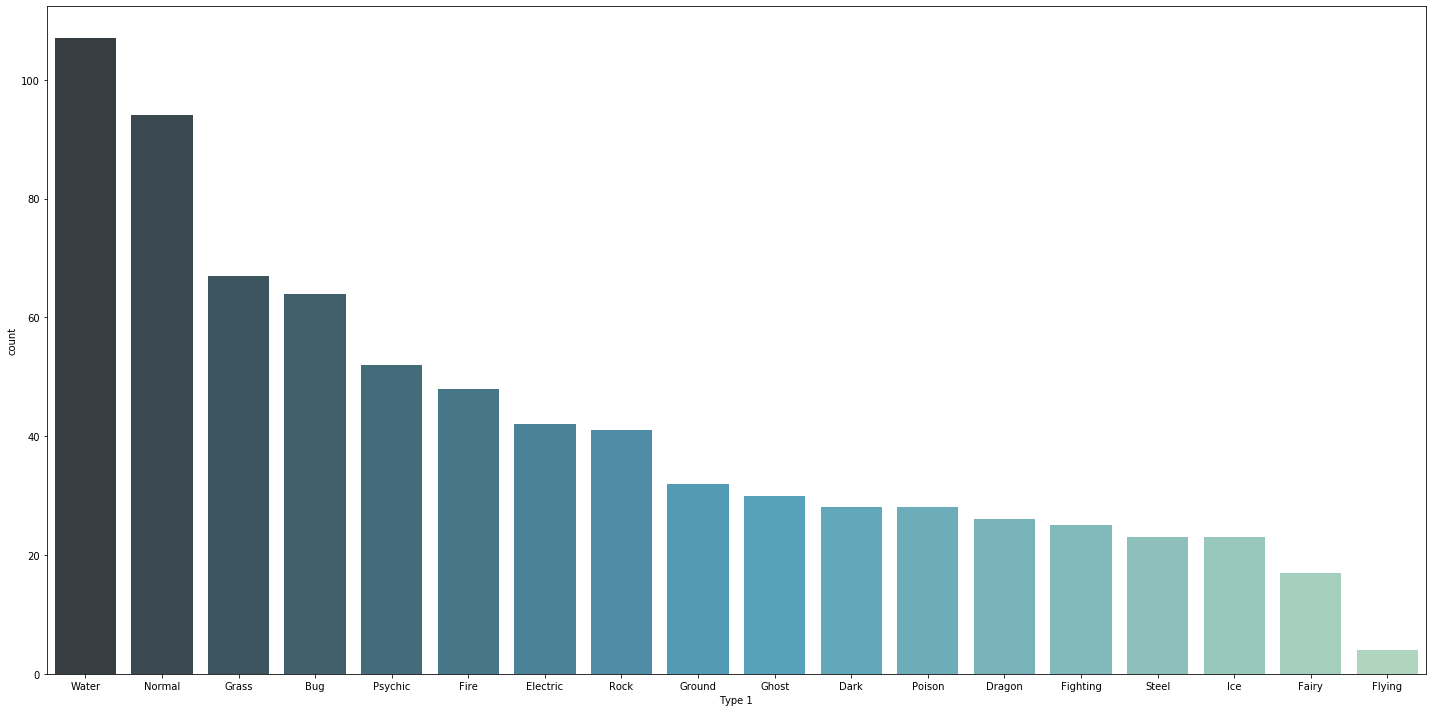

In [6]:
### Visualising the number of Type 2 ###

plt.subplots(figsize=(20, 10))
sns.countplot(x="Type 1", data=pokemon,
            label="Total", palette="GnBu_d",order = pokemon['Type 1'].value_counts().index)
plt.tight_layout()

Out of all generation, Water-type and Normal-type Pokemon are the most common primary type while Flying and Fairy is the least common primary type. It is understandable for Fairy-type as it is a new type that was introduced in Generation 6.

---

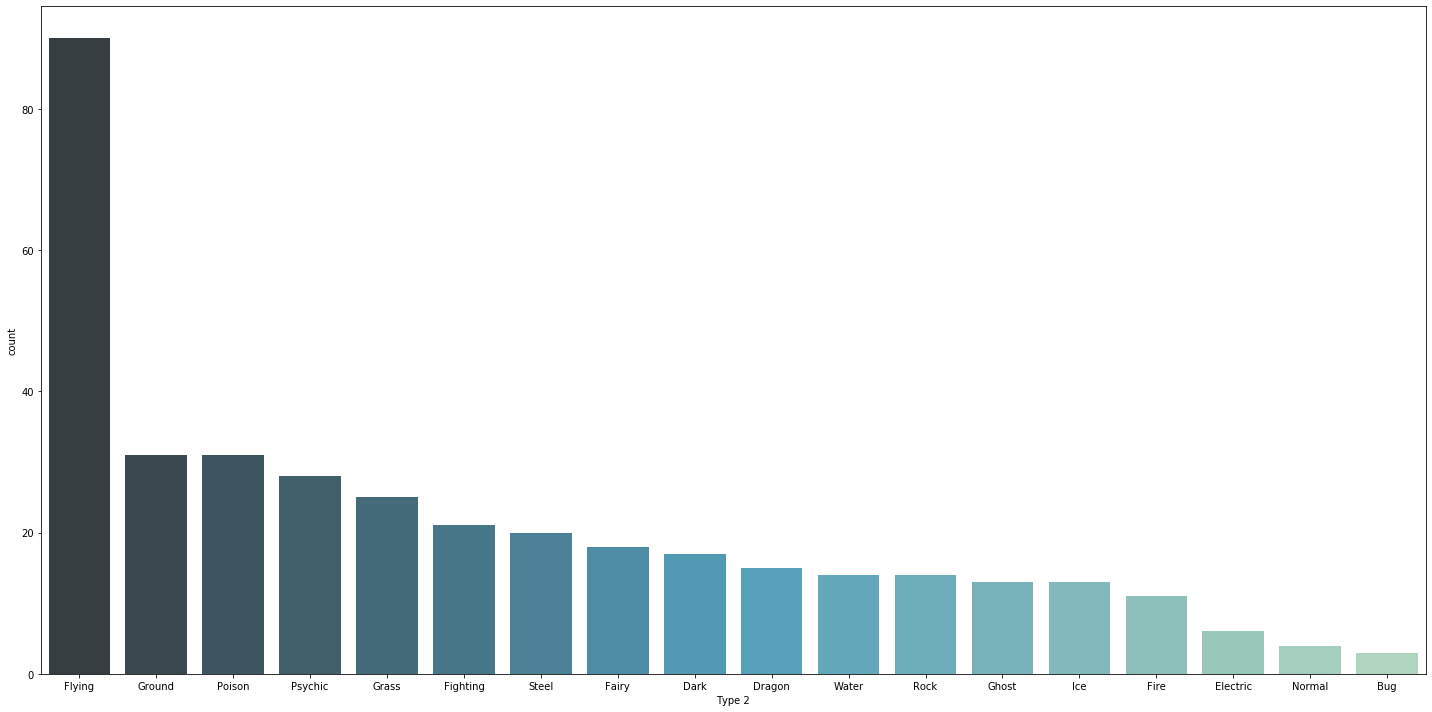

In [7]:
### Visualising the number of Type 2 ###

plt.subplots(figsize=(20, 10))
sns.countplot(x="Type 2", data=pokemon,
            label="Total", palette="GnBu_d",order = pokemon['Type 2'].value_counts().index)
plt.tight_layout()

This is quite interesting as before Flying-type is the least common primary type however, it is the most common secondary type. There is a possibility that when a Pokemon evolves, they gained a secondary type (e.g. Charizard, Togetic) and also Flying-type is one of the most useful in-game type as it can use 'Fly' which ables them to move freely to different cities.

---

Now I am curious with the number of Pokemon with one type or dual type. First, I would find check the 'Type 2' column for any missing values.

In [8]:
### Checking the number of missing values in the dataset ###

pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        377
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

**The total number of Pokemon in our dataset is 751 so 50.1% of the Pokemon has only one type. It is an equal distribution between the types**

---

### Exploration Stage: Total Stats

---

First of all, I will create separate the legendary Pokemon and non-legendary Pokemon into two different data frame

In [9]:
### Creating a new dataframe with only Legendary pokemon ###

legend_pokemon = pokemon[pokemon['Legendary'] == True]

### Creating a new dataframe with only non-Legendary Pokemon

non_legend_pokemon = pokemon[pokemon['Legendary'] == False]  

Now that I have created two different dataset, I would like to know which Legendary Pokemon has the highest and lowest total stats. I will do the same with the non-Legendary Pokemon.

In [10]:
### Create a new dataframe for the highest and lowest stats ###

top_leg_total= legend_pokemon.nlargest(5,'Total')
low_leg_total= legend_pokemon.nsmallest(5, 'Total')
top_non_leg_total = non_legend_pokemon.nlargest(5,'Total')
low_non_leg_total = non_legend_pokemon.nsmallest(5, 'Total')

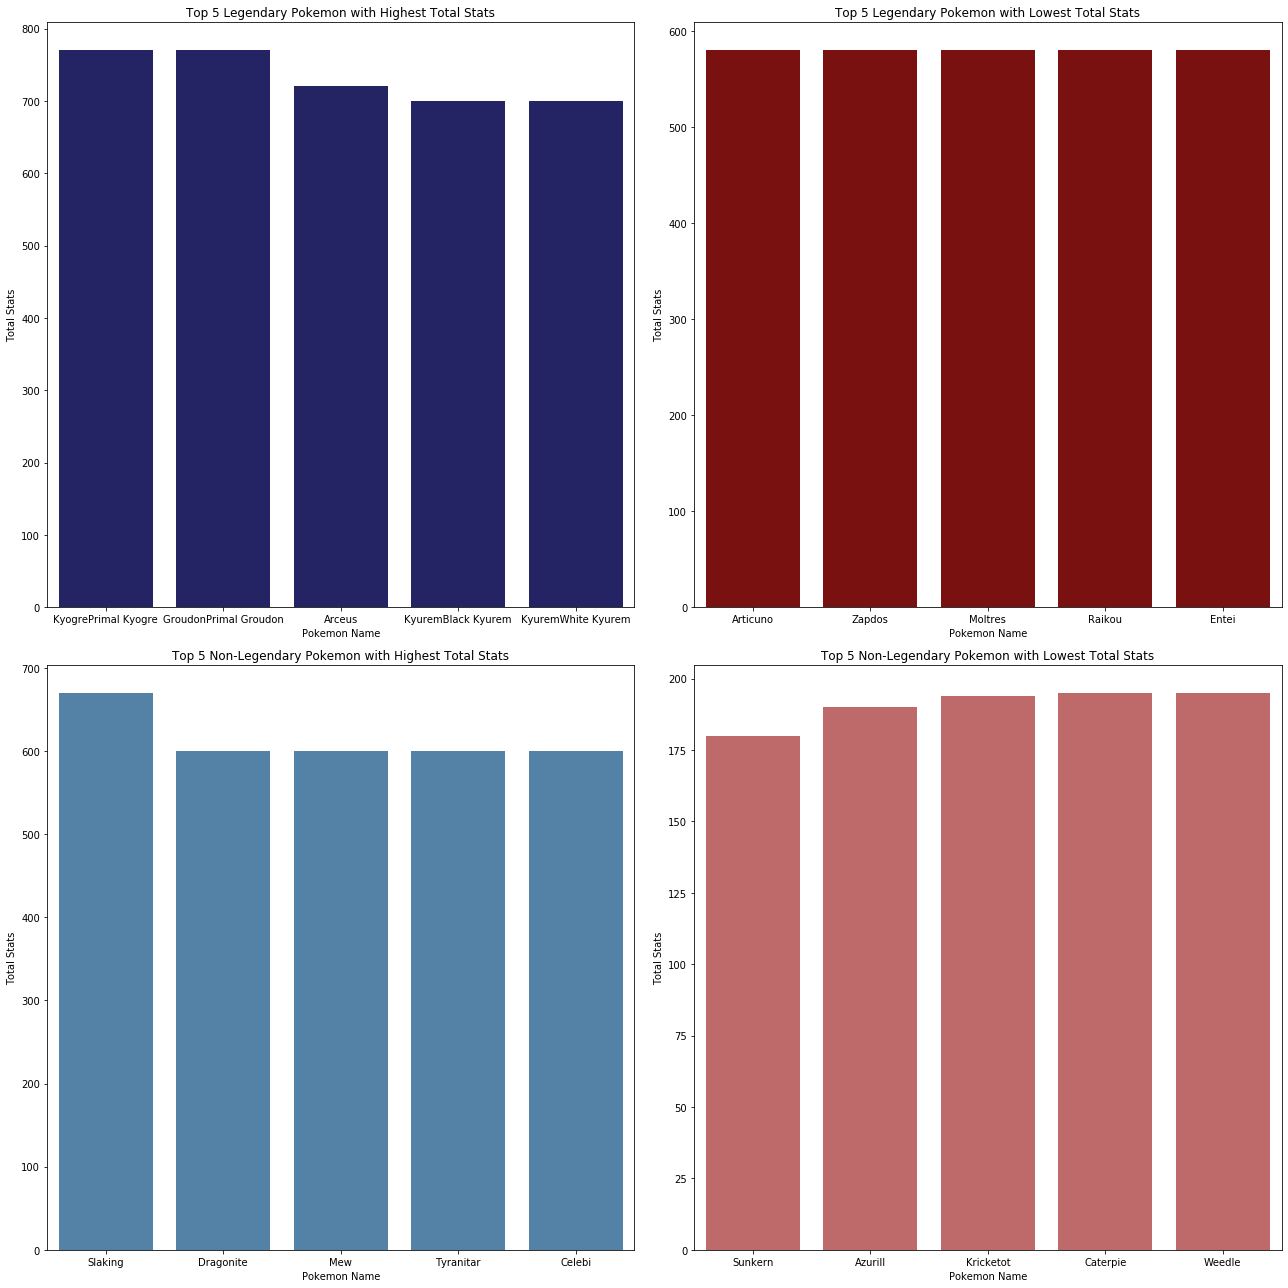

In [11]:
### Set the axis to fit the space ###
fig, ax = plt.subplots(figsize = (18, 18))

### Legendary with highest total stats ###
plt.subplot(2,2,1)
sns.barplot(x = "Name", y = 'Total', data = top_leg_total, color='midnightblue')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Highest Total Stats')


### Legendary with lowest total stats ###
plt.subplot(2,2,2)
sns.barplot(x = "Name", y = 'Total', data = low_leg_total, color='darkred')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Lowest Total Stats')

### Non-legendary with highest total stats ###
plt.subplot(2,2,3)
sns.barplot(x = "Name", y = 'Total', data = top_non_leg_total, color='steelblue')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Highest Total Stats')


### Non-legendary with lowest total stats ###
plt.subplot(2,2,4)
sns.barplot(x = "Name", y = 'Total', data = low_non_leg_total, color='indianred')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Lowest Total Stats')
plt.tight_layout()
plt.show()

**Key Observations:**
<ul>
     <li> The strongest legendary Pokemon are Primal Kyogre and Primal Groudon which is an upgrade from their normal form. The Primal form enhances the ability of the Pokemon by 100 points which makes them one of the strongest in-game Pokemon.
     <li> The Legendary pokemon with the lowest stats are all from Generation 1 & 2. There are also a part of the Legendary group; The Elemental Bird (Moltres, Articuno & Zapdos) and Elemental Dog (Entei, Suicune and Raikou). Usually, Legendary pokemon has a base stats of 600 however, this six Pokemon is an excpetion with base stats of 580.
     <li> For the non-legendary, Slaking has a massive 680 base stats that he overpowers some of the legendary. However, Slaking has an ability called Truant where every second turn, Slaking cannot move which compensates with his high base stats (in-game). 
     <li> For the lowest stats, all of them are 1st stage evolutionary Pokemon and 3 of them are a Bug-type Pokemon which by research shows that they are the weakest Pokemon type but also the quickest Type to evolve.

---

**Now, I will plot all stats (Atk, Def, Sp.Atk, Sp.Def, Spd) for the Legendary Pokemon**

In [12]:
### Create a new dataframe for Legendary Pokemon stats ###
top_leg_atk= legend_pokemon.nlargest(5,'Attack')
low_leg_atk= legend_pokemon.nsmallest(5, 'Attack')
top_leg_def= legend_pokemon.nlargest(5,'Defense')
low_leg_def= legend_pokemon.nsmallest(5, 'Defense')
top_leg_spatk= legend_pokemon.nlargest(5,'Sp. Atk')
low_leg_spatk= legend_pokemon.nsmallest(5, 'Sp. Atk')
top_leg_spdef= legend_pokemon.nlargest(5,'Sp. Def')
low_leg_spdef= legend_pokemon.nsmallest(5, 'Sp. Def')
top_leg_spd= legend_pokemon.nlargest(5,'Speed')
low_leg_spd= legend_pokemon.nsmallest(5, 'Speed')
top_leg_hp= legend_pokemon.nlargest(5,'HP')
low_leg_hp= legend_pokemon.nsmallest(5, 'HP')

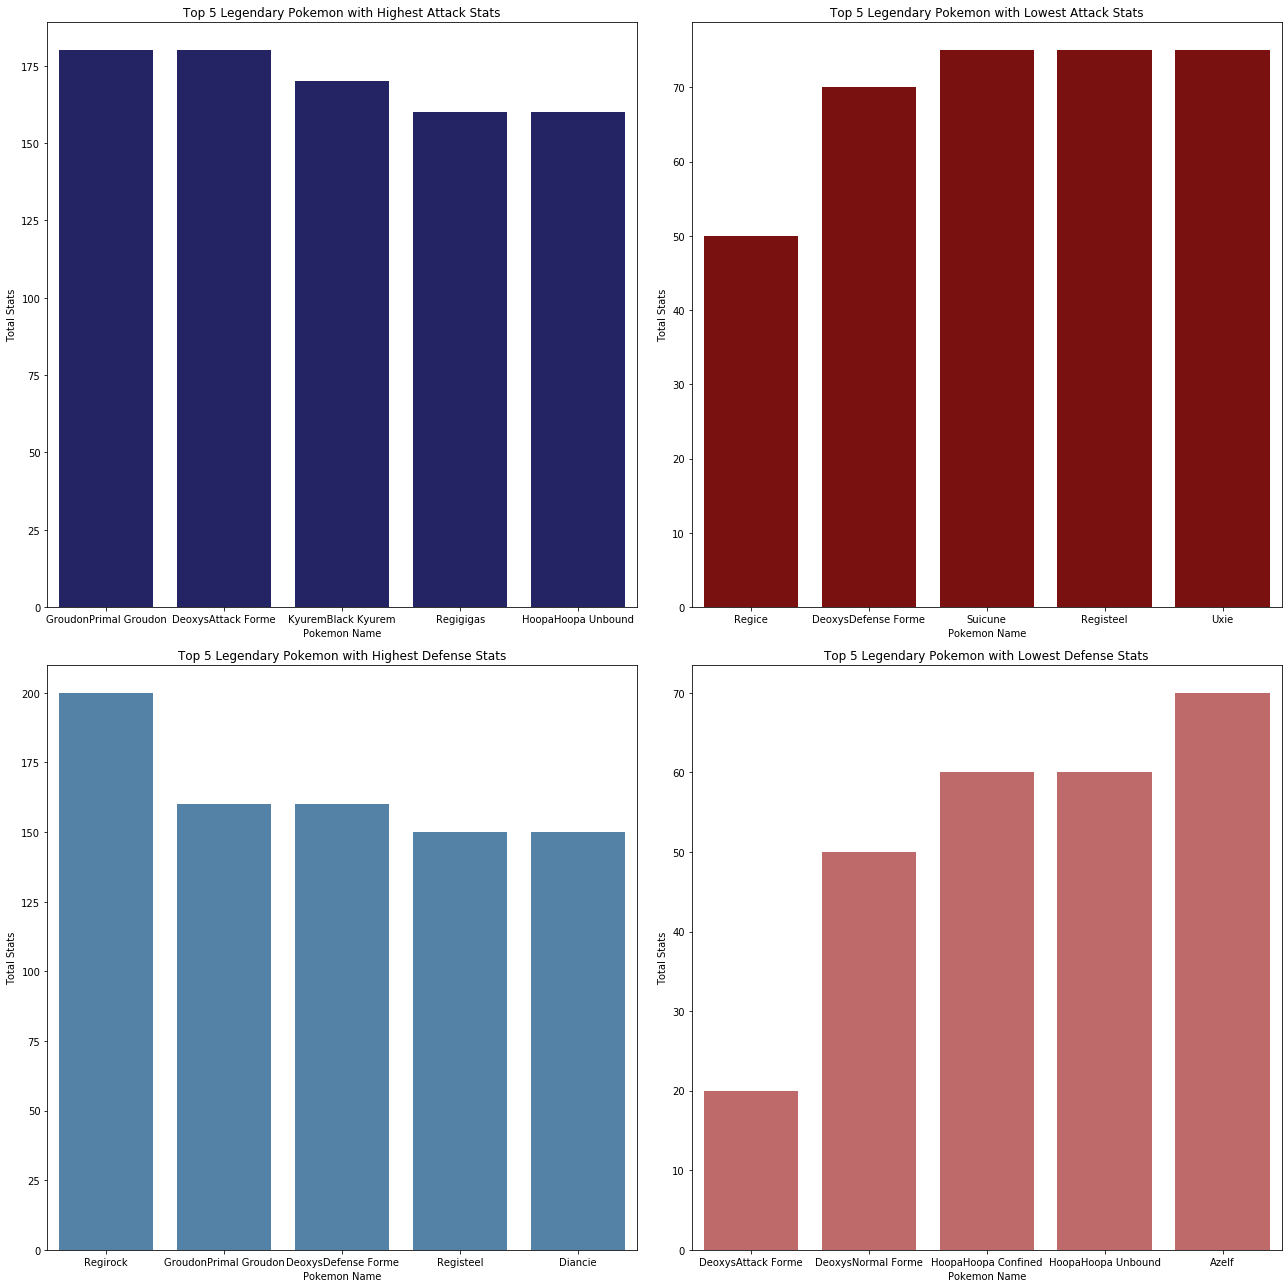

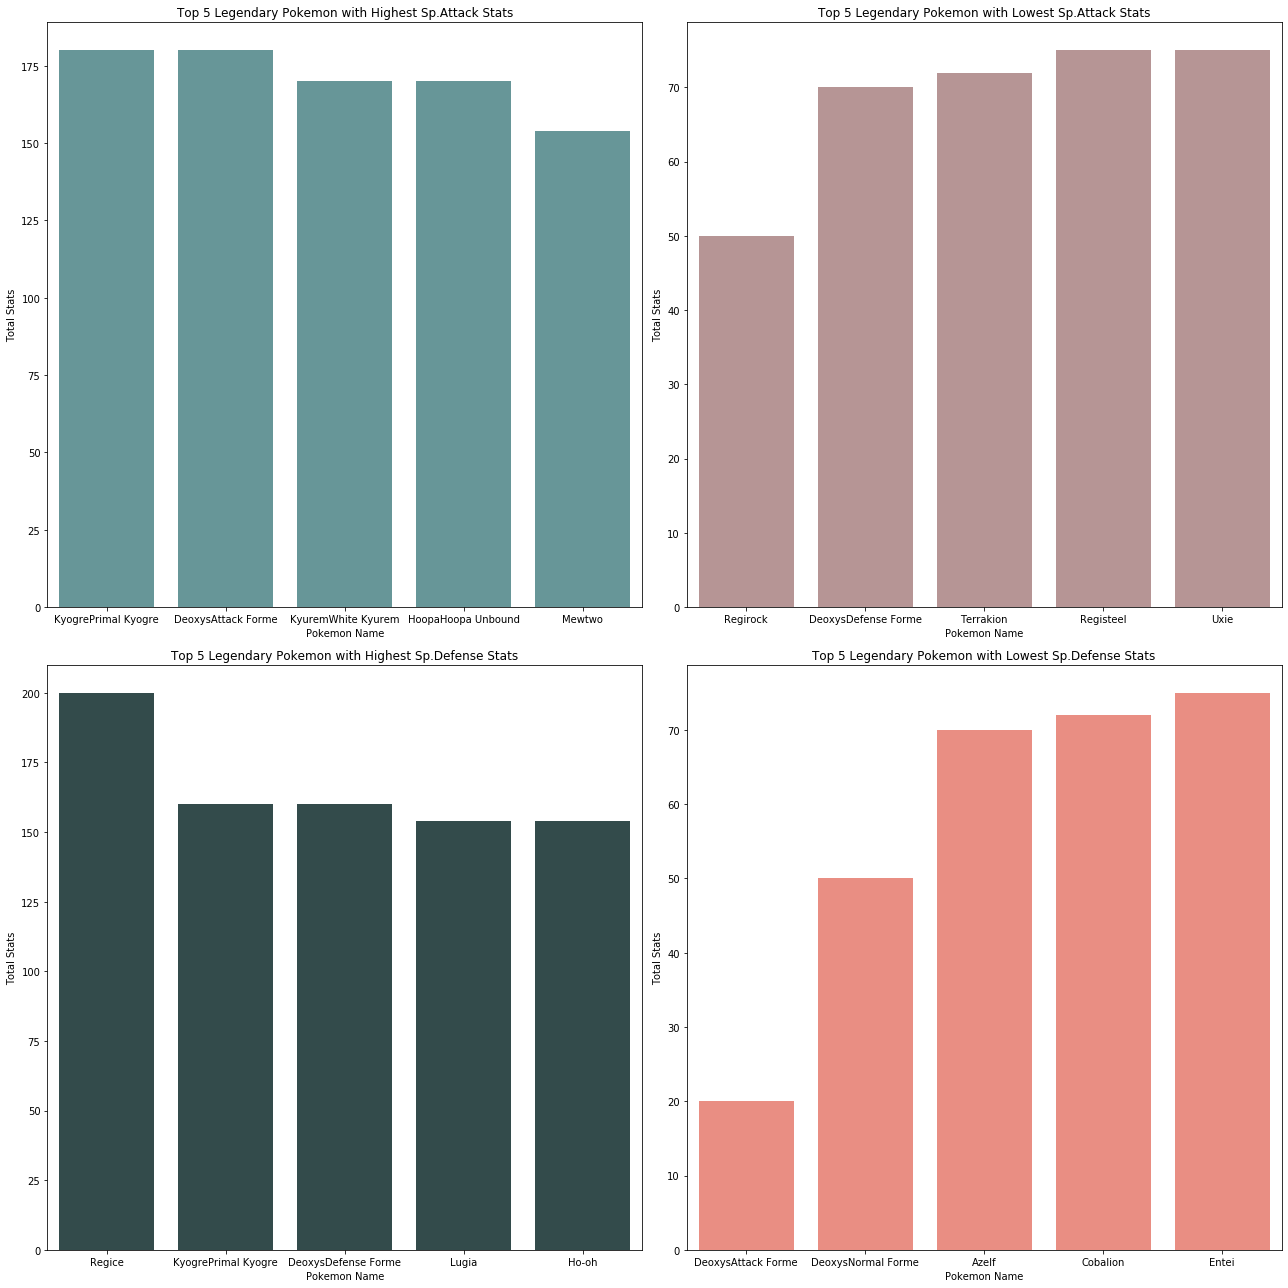

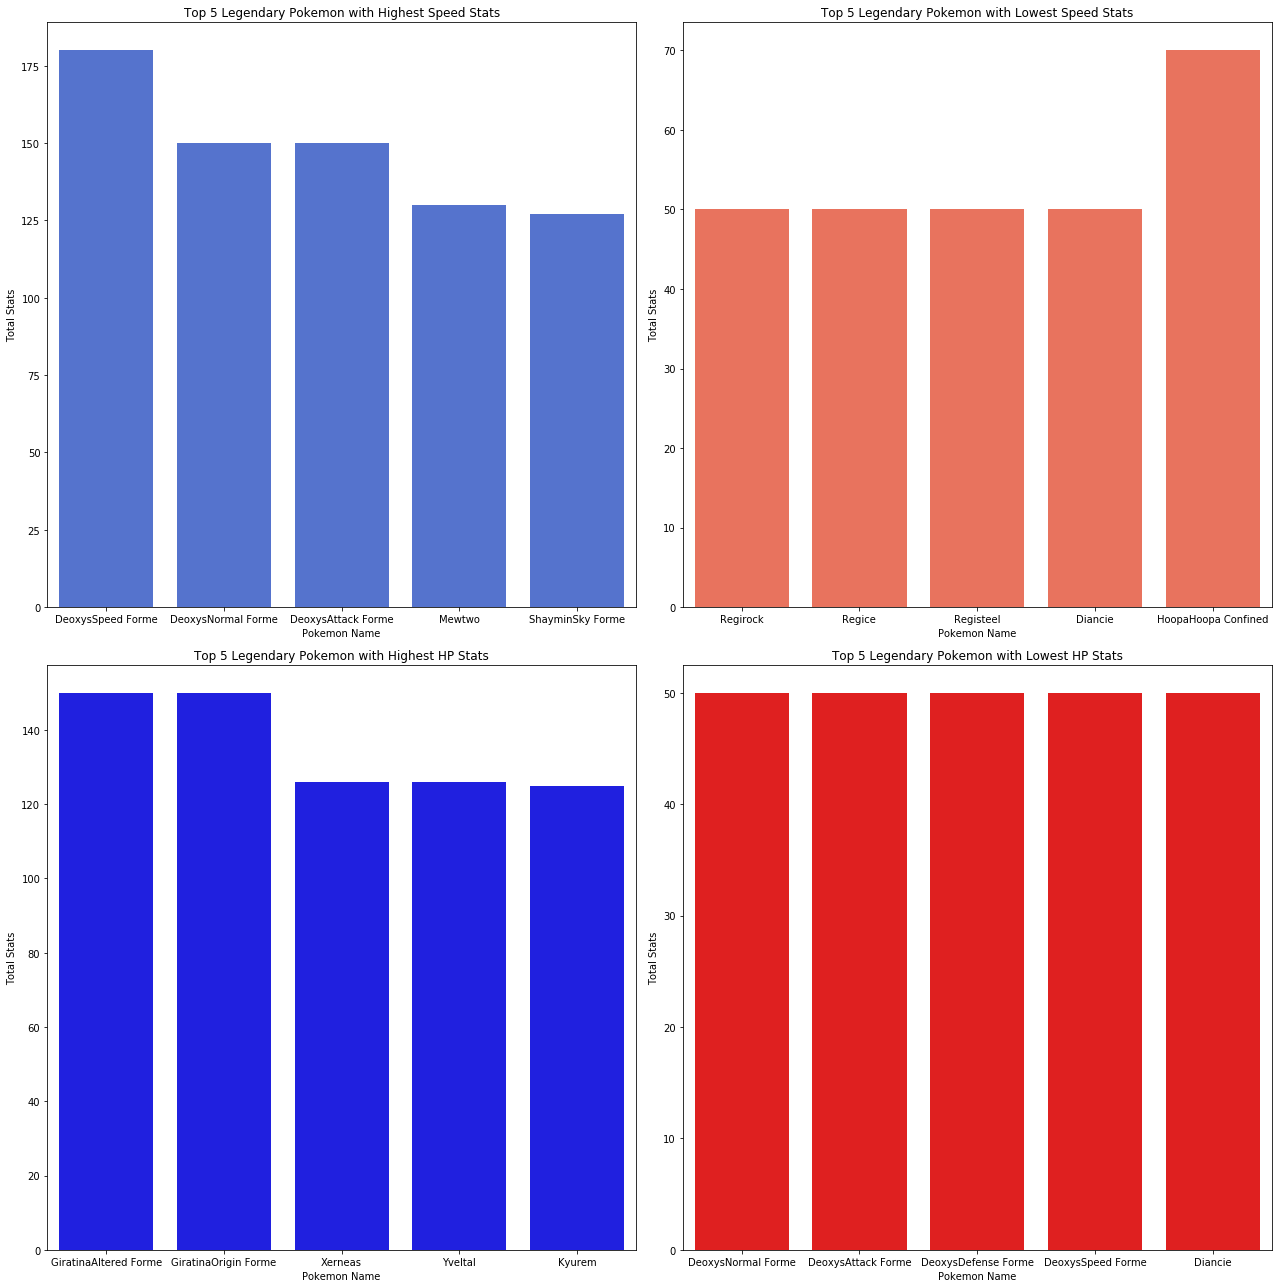

In [13]:
### Visualising the Legendary Pokemon stats ###
fig, ax = plt.subplots(figsize = (18, 18))

### Legendary with highest attack stats ###
plt.subplot(2,2,1)
sns.barplot(x = "Name", y = 'Attack', data = top_leg_atk, color='midnightblue')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Highest Attack Stats')

### Legendary with lowest attack stats ###
plt.subplot(2,2,2)
sns.barplot(x = "Name", y = 'Attack', data = low_leg_atk, color='darkred')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Lowest Attack Stats')

### Legendary with highest defense stats ###
plt.subplot(2,2,3)
sns.barplot(x = "Name", y = 'Defense', data = top_leg_def, color='steelblue')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Highest Defense Stats')

### Legendary with lowest defense stats ###
plt.subplot(2,2,4)
sns.barplot(x = "Name", y = 'Defense', data = low_leg_def, color='indianred')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Lowest Defense Stats')
plt.tight_layout()
plt.show()

##############################################################################
fig, ax = plt.subplots(figsize = (18, 18))

### Legendary with highest sp.atk stats ###
plt.subplot(2,2,1)
sns.barplot(x = "Name", y = 'Sp. Atk', data = top_leg_spatk, color='cadetblue')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Highest Sp.Attack Stats')

### Legendary with lowest sp.attack stats ###
plt.subplot(2,2,2)
sns.barplot(x = "Name", y = 'Sp. Atk', data = low_leg_spatk, color='rosybrown')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Lowest Sp.Attack Stats')

### Legendary with highest sp.defense stats ###
plt.subplot(2,2,3)
sns.barplot(x = "Name", y = 'Sp. Def', data = top_leg_spdef, color='darkslategrey')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Highest Sp.Defense Stats')

### Legendary with lowest sp.defense stats ###
plt.subplot(2,2,4)
sns.barplot(x = "Name", y = 'Sp. Def', data = low_leg_spdef, color='salmon')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Lowest Sp.Defense Stats')
plt.tight_layout()
plt.show()

##############################################################################
fig, ax = plt.subplots(figsize = (18, 18))

### Legendary with highest speed stats ###
plt.subplot(2,2,1)
sns.barplot(x = "Name", y = 'Speed', data = top_leg_spd, color='royalblue')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Highest Speed Stats')

### Legendary with lowest speed stats ###
plt.subplot(2,2,2)
sns.barplot(x = "Name", y = 'Speed', data = low_leg_spd, color='tomato')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Lowest Speed Stats')

### Legendary with highest HP stats ###
plt.subplot(2,2,3)
sns.barplot(x = "Name", y = 'HP', data = top_leg_hp, color='b')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Highest HP Stats')

### Legendary with lowest HP stats ###
plt.subplot(2,2,4)
sns.barplot(x = "Name", y = 'HP', data = low_leg_hp, color='r')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Legendary Pokemon with Lowest HP Stats')
plt.tight_layout()
plt.show()

**Key Observations:**


For the Attack stats, Primary Groudon & Attack Forme Deoxys tops the rank. For Deoxys, it has 4 different forms: Normal, Attack, Defense & Speed and each form emphasis on one particular stats so it is reasonable for Attack from Deoxys to top the Attack stats. For the Lowest stats, we expected Deoxys Defense form to be there as it sacrifices all of the Attack stats and put more effort on the Defense stats. Also, most of the Legendary that has the lowest Attack are all Special Attackers meaning that they are known for the Special Attacks such as Uxie (Physic-type) and Suicune (Water-type).
        
For the Defense Stats, Deoxys Defense Form and Regirock are on the top of the list. Regirock is one of the Elemental Titans from Generation III and it is known as one of the bulkiest Pokemon in the entire game. Although it sacrifices a lot of his offense and speed. For the weakest Defense stats, We can see that Deoxys Attack Form presented here along with other Special Attackers that is specialize in Special Stats (e.g. Azelf, Diance).
        
For the Special Stats, I realize a pattern that Primal Kyogre are specialize in the Special stats (Sp.Atk & Sp.Def) and Primal Groudon is specialize in the Physical Stats (Attack & Special Attack). Similar to Regirock's case, Regice (one of the Elemental Titans) has the strongest Sp.Def in the Pokemon world.
         
For the Speed stats, 3/4 Deoxys Form out speed the others making them the fastest Legendary Pokemon. In contrast, the Elemental Titans overwhelming Defense and Attacks stats aren't able to be coped with their terrible Speed meaning that they will have a hard time blow an attack first in the game unless the other Pokemon has a lower Speed stats.
          
For the HP, surprisingly the Pokemon with high Defense and Sp.Def is not there. Usually, the Defense and Sp.Def need to have a high HP stats in order for them to bulky enough to withstand attacks. One thing that surprises me is that the Deoxys have the lowest HP but also its Defense form only have 50 HP which makes them a pretty bad combination for an in-game Tank.

---

**Now, I will create visuals for the stats on non-legendary Pokemon**

In [14]:
### Create a new dataframe for non-legendary Pokemon stats ###
top_non_leg_atk= non_legend_pokemon.nlargest(5,'Attack')
low_non_leg_atk= non_legend_pokemon.nsmallest(5, 'Attack')
top_non_leg_def= non_legend_pokemon.nlargest(5,'Defense')
low_non_leg_def= non_legend_pokemon.nsmallest(5, 'Defense')
top_non_leg_spatk= non_legend_pokemon.nlargest(5,'Sp. Atk')
low_non_leg_spatk= non_legend_pokemon.nsmallest(5, 'Sp. Atk')
top_non_leg_spdef= non_legend_pokemon.nlargest(5,'Sp. Def')
low_non_leg_spdef= non_legend_pokemon.nsmallest(5, 'Sp. Def')
top_non_leg_spd= non_legend_pokemon.nlargest(5,'Speed')
low_non_leg_spd= non_legend_pokemon.nsmallest(5, 'Speed')
top_non_leg_hp= non_legend_pokemon.nlargest(5,'HP')
low_non_leg_hp= non_legend_pokemon.nsmallest(5, 'HP')

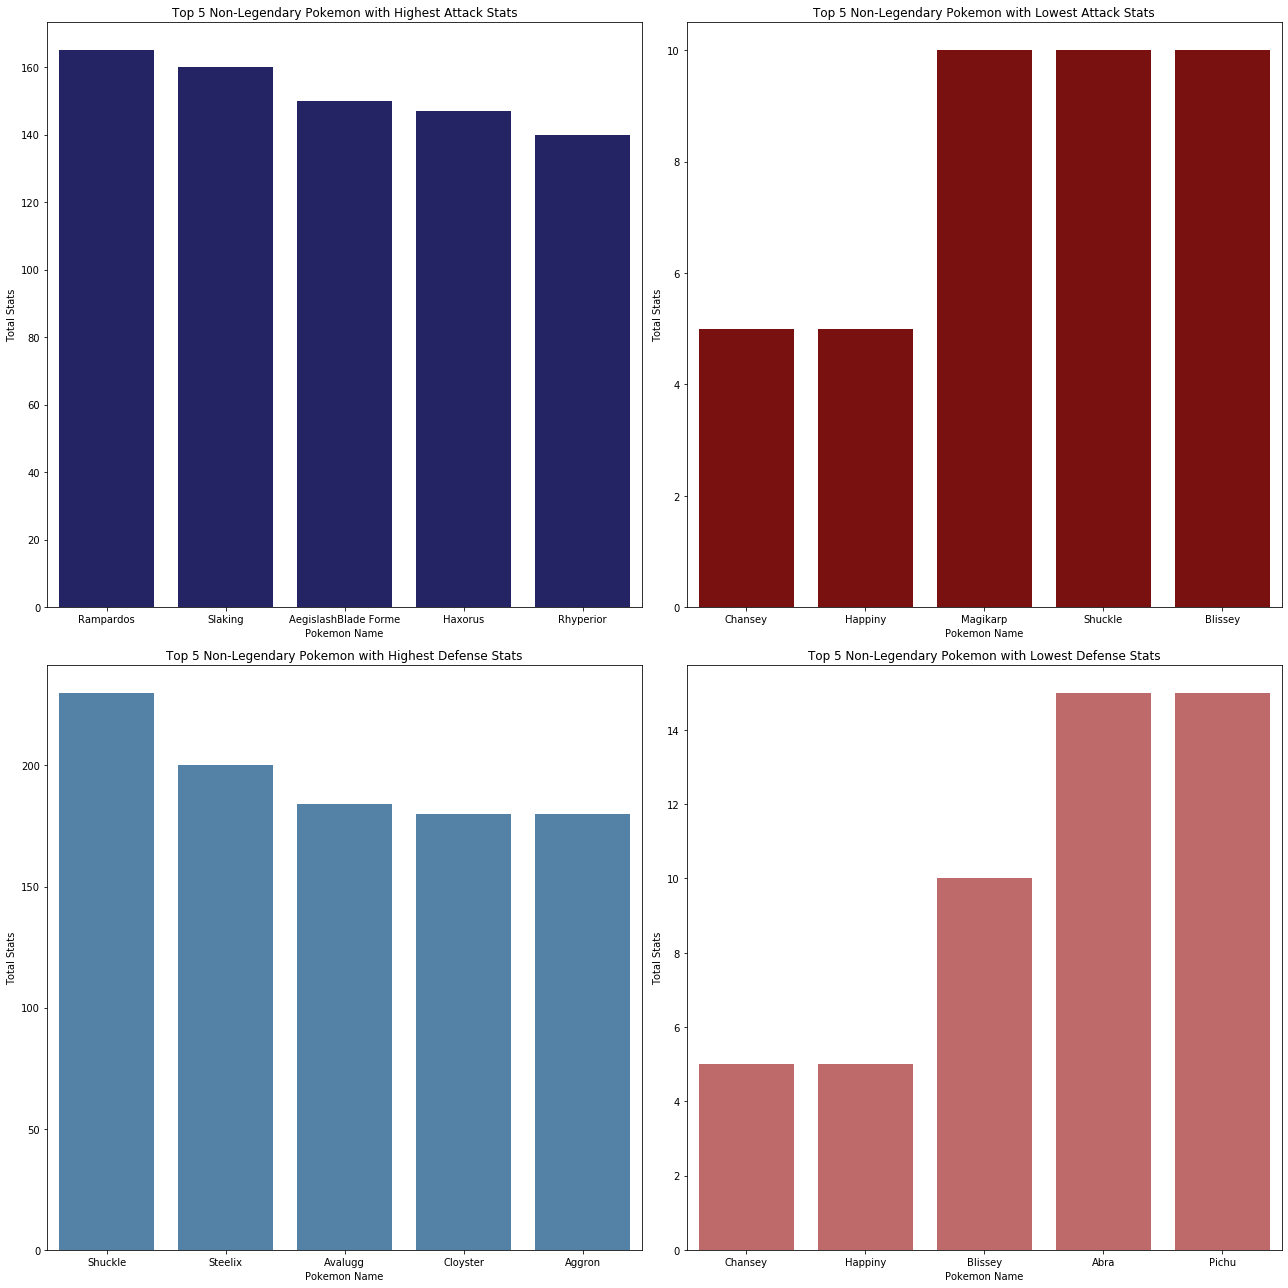

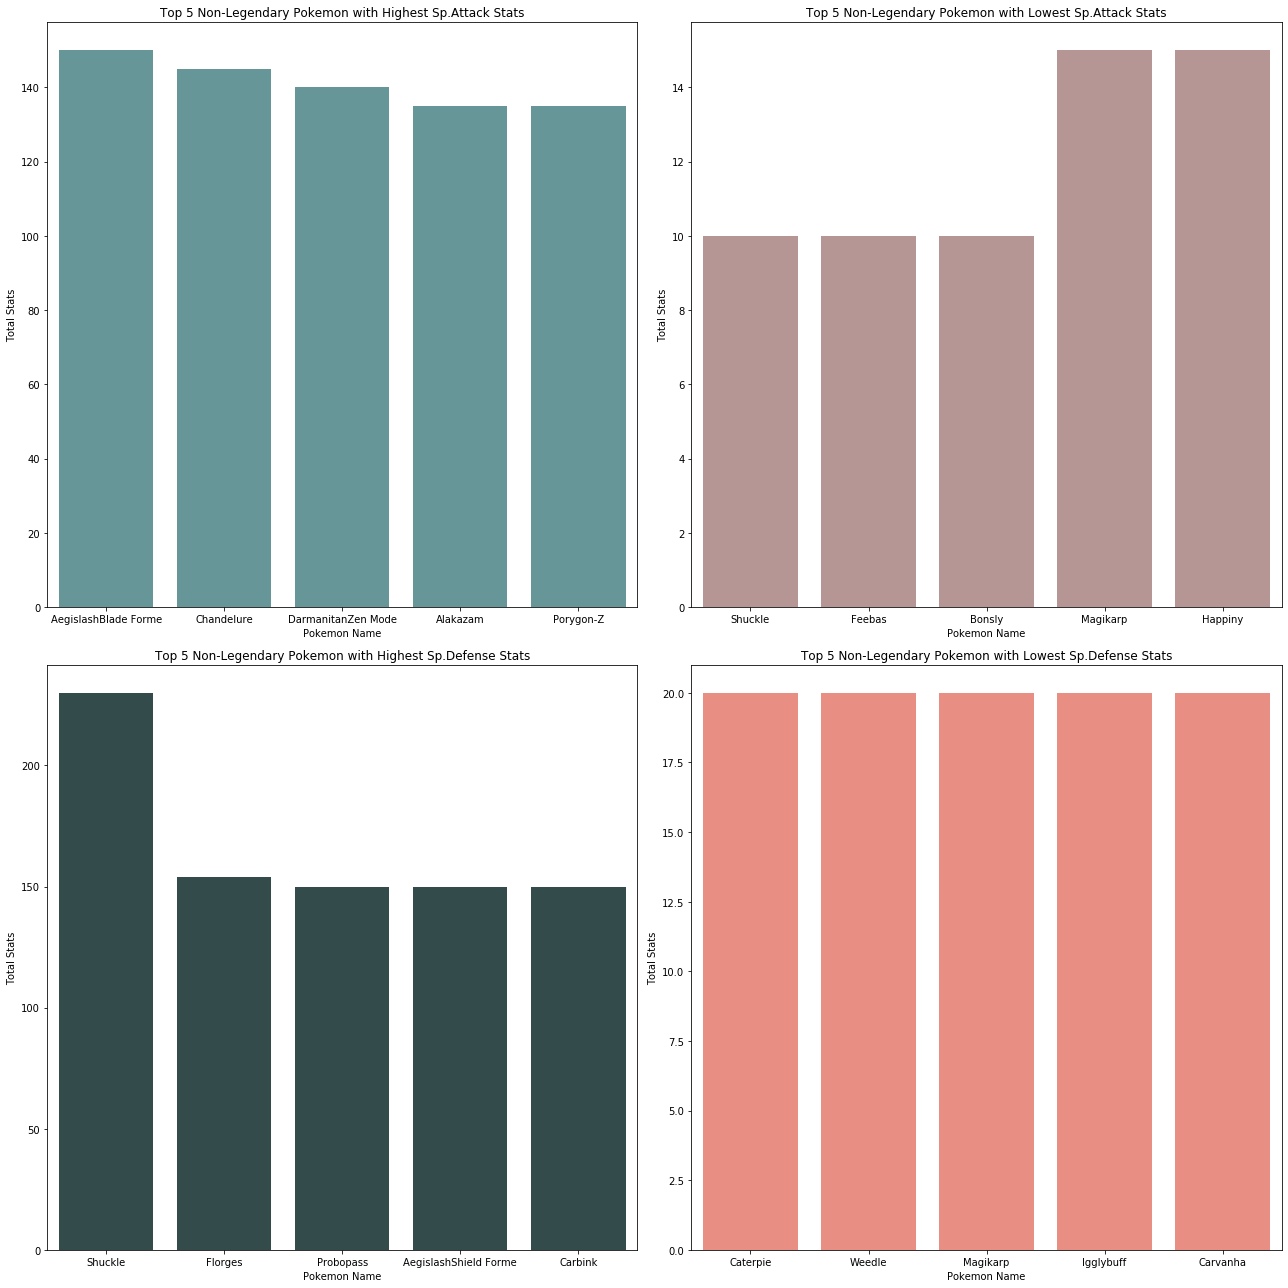

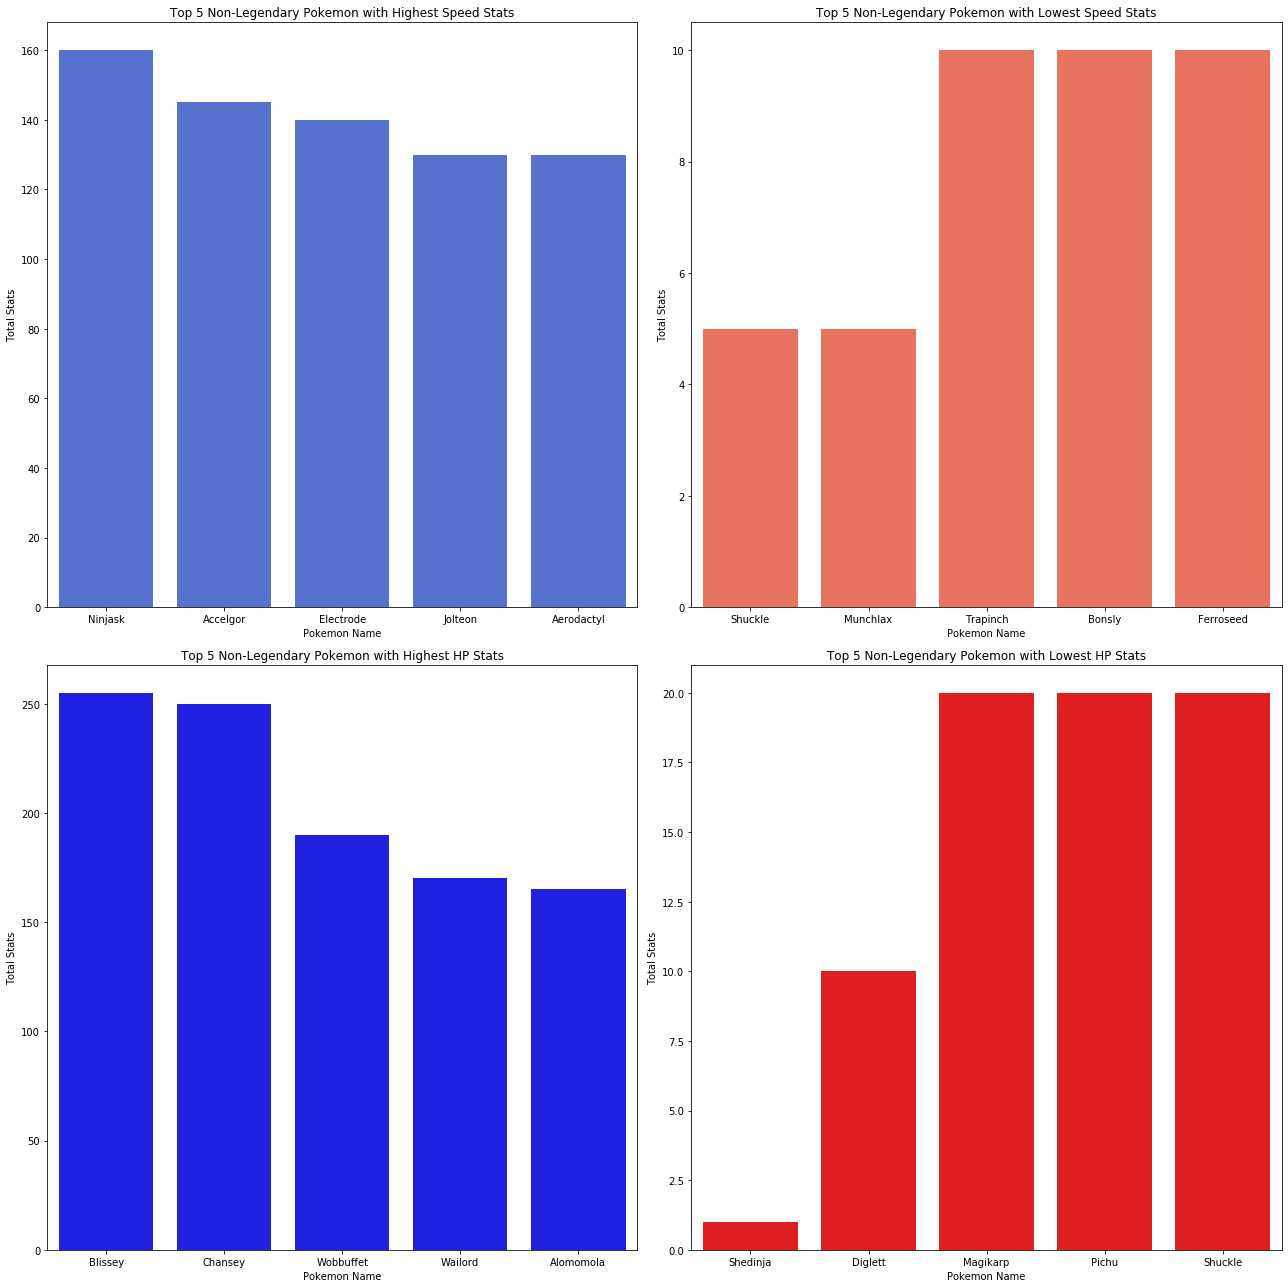

In [15]:
### Visualising the non-legendary Pokemon stats ###
fig, ax = plt.subplots(figsize = (18, 18))

### Non-Legendary with highest attack stats ###
plt.subplot(2,2,1)
sns.barplot(x = "Name", y = 'Attack', data = top_non_leg_atk, color='midnightblue')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Highest Attack Stats')

### Non-Legendary with lowest attack stats ###
plt.subplot(2,2,2)
sns.barplot(x = "Name", y = 'Attack', data = low_non_leg_atk, color='darkred')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Lowest Attack Stats')

### Non-Legendary with highest defense stats ###
plt.subplot(2,2,3)
sns.barplot(x = "Name", y = 'Defense', data = top_non_leg_def, color='steelblue')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Highest Defense Stats')

### Non-Legendary with lowest defense stats ###
plt.subplot(2,2,4)
sns.barplot(x = "Name", y = 'Defense', data = low_non_leg_def, color='indianred')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Lowest Defense Stats')
plt.tight_layout()
plt.show()

##############################################################################
fig, ax = plt.subplots(figsize = (18, 18))

### Non-Legendary with highest sp.atk stats ###
plt.subplot(2,2,1)
sns.barplot(x = "Name", y = 'Sp. Atk', data = top_non_leg_spatk, color='cadetblue')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Highest Sp.Attack Stats')

### Non-Legendary with lowest sp.attack stats ###
plt.subplot(2,2,2)
sns.barplot(x = "Name", y = 'Sp. Atk', data = low_non_leg_spatk, color='rosybrown')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Lowest Sp.Attack Stats')

### Non-Legendary with highest sp.defense stats ###
plt.subplot(2,2,3)
sns.barplot(x = "Name", y = 'Sp. Def', data = top_non_leg_spdef, color='darkslategrey')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Highest Sp.Defense Stats')

### Non-Legendary with lowest sp.defense stats ###
plt.subplot(2,2,4)
sns.barplot(x = "Name", y = 'Sp. Def', data = low_non_leg_spdef, color='salmon')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Lowest Sp.Defense Stats')
plt.tight_layout()
plt.show()

##############################################################################
fig, ax = plt.subplots(figsize = (18, 18))

### Non-Legendary with highest speed stats ###
plt.subplot(2,2,1)
sns.barplot(x = "Name", y = 'Speed', data = top_non_leg_spd, color='royalblue')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Highest Speed Stats')

### Non-Legendary with lowest speed stats ###
plt.subplot(2,2,2)
sns.barplot(x = "Name", y = 'Speed', data = low_non_leg_spd, color='tomato')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Lowest Speed Stats')

### Non-Legendary with highest HP stats ###
plt.subplot(2,2,3)
sns.barplot(x = "Name", y = 'HP', data = top_non_leg_hp, color='b')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Highest HP Stats')

### Non-Legendary with lowest HP stats ###
plt.subplot(2,2,4)
sns.barplot(x = "Name", y = 'HP', data = low_non_leg_hp, color='r')
plt.xlabel('Pokemon Name')
plt.ylabel('Total Stats')
plt.title ('Top 5 Non-Legendary Pokemon with Lowest HP Stats')
plt.tight_layout()
plt.show()

**Key Observation**

1. An interesting pokemon here called Shuckle where it has a Defense & Sp.Def base stats of 230 which makes it the best defensive Pokemon in the game. However, If we look at its other stats, Shuckle has only 20 HP meaning that it can withstand damage but it doesn't have enough HP to compensate it. Also its Attack, Speed & Sp.Attack stats are quite embarrassing. This is an example that explains how when we pick our Pokemon, we shouldn't focus on one stats rather look at its overall. 

2. Blissey, Chansey & Happiny has one evolutionary stage and they are know to have the best HP in the game. But, their overall stats are so-so. Pokemons such as Shuckle and Blissey are good for Tanks which means they can sustain certain damage and heal others Pokemon but they are not a good offensive Pokemon. 

3. If you want a good Pokemon for offensive, definitely look at their Attack & Sp.Atk. Usually, a pokemon is either has a good Attack stats or Sp.Attack. Having both high Attack & Sp.Atk is quite rare but there is one Pokemon who has that stat: Aeglish Blade Form. This is a unique Pokemon where it can change form (Blade Form & Shield Form). Blade form focuses on the offensive stats and Shield form focuses on defensive stats. This is a good Pokemon to consider for both Tank (Can sustain damage) and Sweeper type (has strong offensive stats). Although it Speed is really low, it is well-balanced Pokemon on Defense and Offense.

4. One thing that surprise me is that usually, an Electric-type Pokemon has one of the lowest Speed stat in game but on the graph, Jolteon and Electrode has a high Speed stats. This is quite interesting as Electric-type is one of the best Offensive moveset and with a high Speed stats, it could potentially become a great Sweeper. 

5. For all Lowest stats, almost every Pokemon is on their first-stage of the evolutionary (except Chansey) which is a given as they start really weak. To take note, it would be better if you have a fully-evolved Pokemon in order to compete in the game.

---

### Exploration Stage: 'Generation' Column

In [16]:
### Number of Pokemon in each generation ###

pokemon['Generation'].value_counts()

### Number of Legendary Pokemon in each generation ###

legend_pokemon['Generation'].value_counts()

### Number of Non-Legendary Pokemon in each generation ###

non_legend_pokemon['Generation'].value_counts()

5    149
1    147
3    125
4    102
2     95
6     74
Name: Generation, dtype: int64

Now, I will create a new data frame for each generation and analyze the Pokemon type.

In [17]:
### Creating a new dataframe for each generation ###

pokemon_gen1 = pokemon[pokemon['Generation'] == 1]
pokemon_gen2 = pokemon[pokemon['Generation'] == 2]
pokemon_gen3 = pokemon[pokemon['Generation'] == 3]
pokemon_gen4 = pokemon[pokemon['Generation'] == 4]
pokemon_gen5 = pokemon[pokemon['Generation'] == 5]
pokemon_gen6 = pokemon[pokemon['Generation'] == 6]

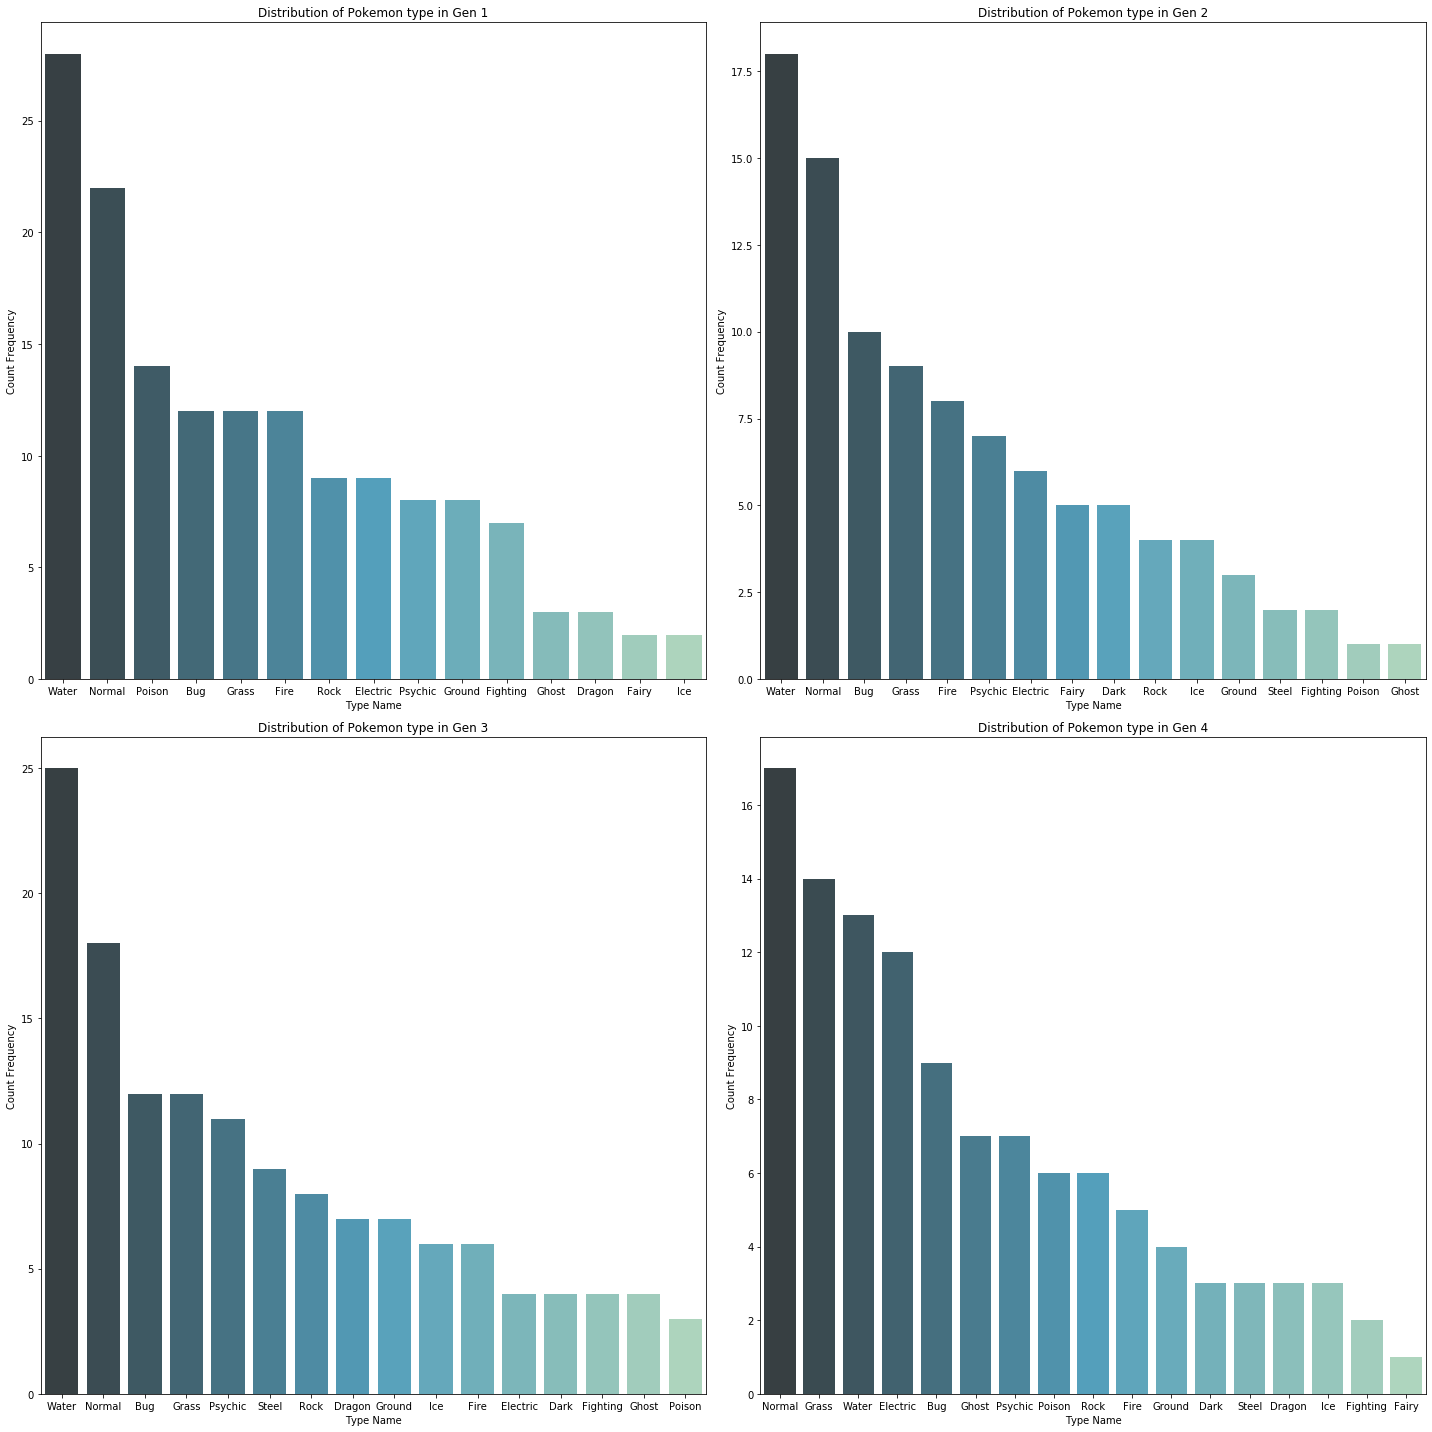

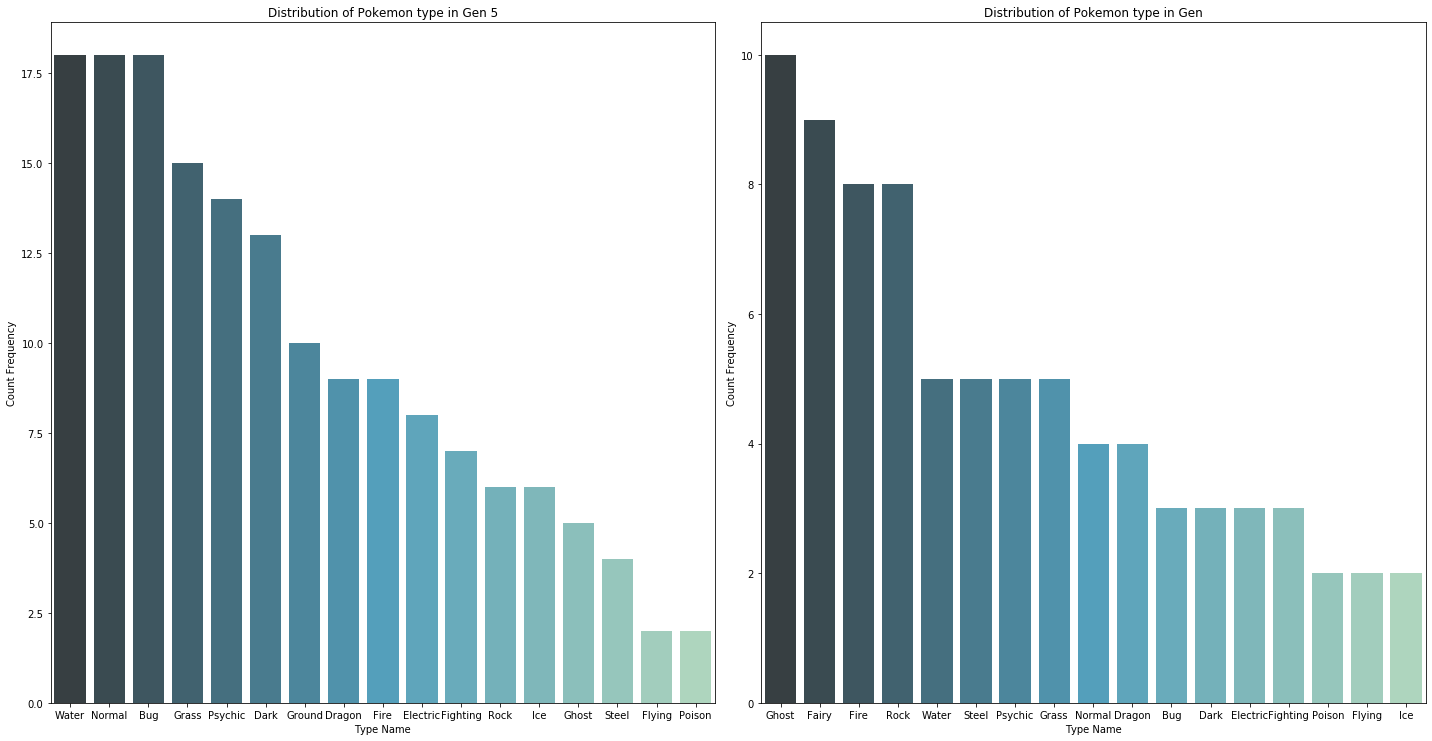

In [18]:
### Visualising the most common types for each generation ###
fig, ax = plt.subplots(figsize = (20, 20))

### Generation 1 ###
plt.subplot(2,2,1)
sns.countplot(x="Type 1", data=pokemon_gen1,
            label="Total", palette="GnBu_d",
            order = pokemon_gen1['Type 1'].value_counts().index)
plt.xlabel('Type Name')
plt.ylabel('Count Frequency')
plt.title ('Distribution of Pokemon type in Gen 1')

### Generation 2 ###
plt.subplot(2,2,2)
sns.countplot(x="Type 1", data=pokemon_gen2,
            label="Total", palette="GnBu_d",
            order = pokemon_gen2['Type 1'].value_counts().index)
plt.xlabel('Type Name')
plt.ylabel('Count Frequency')
plt.title ('Distribution of Pokemon type in Gen 2')

### Generation 3 ###
plt.subplot(2,2,3)
sns.countplot(x="Type 1", data=pokemon_gen3,
            label="Total", palette="GnBu_d",
            order = pokemon_gen3['Type 1'].value_counts().index)
plt.xlabel('Type Name')
plt.ylabel('Count Frequency')
plt.title ('Distribution of Pokemon type in Gen 3')

### Generation 4 ###
plt.subplot(2,2,4)
sns.countplot(x="Type 1", data=pokemon_gen4,
            label="Total", palette="GnBu_d",
            order = pokemon_gen4['Type 1'].value_counts().index)
plt.xlabel('Type Name')
plt.ylabel('Count Frequency')
plt.title ('Distribution of Pokemon type in Gen 4')
plt.tight_layout()
plt.show()

#############################################################################
fig, ax = plt.subplots(figsize = (20, 20))

### Generation 5 ###
plt.subplot(2,2,1)
sns.countplot(x="Type 1", data=pokemon_gen5,
            label="Total", palette="GnBu_d",
            order = pokemon_gen5['Type 1'].value_counts().index)
plt.xlabel('Type Name')
plt.ylabel('Count Frequency')
plt.title ('Distribution of Pokemon type in Gen 5')

### Generation 6 ###
plt.subplot(2,2,2)
sns.countplot(x="Type 1", data=pokemon_gen6,
            label="Total", palette="GnBu_d",
            order = pokemon_gen6['Type 1'].value_counts().index)
plt.xlabel('Type Name')
plt.ylabel('Count Frequency')
plt.title ('Distribution of Pokemon type in Gen')
plt.tight_layout()
plt.show()

---

**Key Observation**

1. In all generation, Water-type's presence is huge so there would be no problem to find a Water-type Pokemon in each generation. I also believe that Water-type is the most versatile type which can learn 4 HM move (Surf, Dive, Waterfall, Whirlpool) which is crucial in the game.

2. Normal Pokemon is the common type and considered as the neutral type. It is also a great type as it only has one weakness; Fighting-type but they cannot attack Ghost-type. I would highly recommend a Normal-type pokemon as it is also the most versatile Pokemon.

3. One pattern that I found is that there is not a lot of Flying-type as it is the most common secondary-type in the Pokemon world. Rest assure, even if the graph shows that there is no Flying-type, there are plenty of Pokemon with secondary Flying-Type (remember, 50% of the total Pokemon are dual-type and Flying-type is the most common). Flying-type is also important as it can learn "Fly" which is useful for in-game.

I also want to find out the most common Legendary type

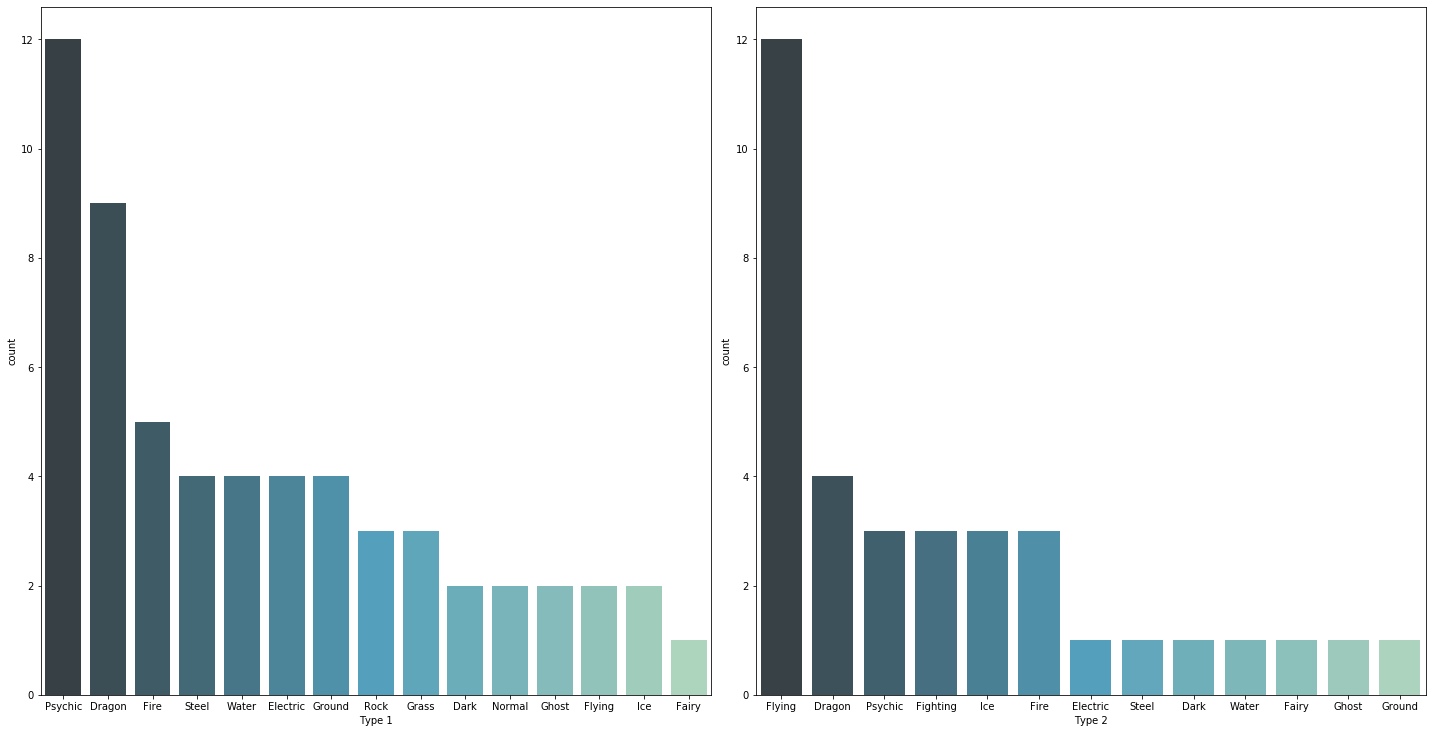

In [19]:
fig, ax = plt.subplots(figsize = (20, 20))

### Most common Legendary Type 1 ###
plt.subplot(2,2,1)
sns.countplot(x="Type 1", data=legend_pokemon,
            label="Total", palette="GnBu_d",order = legend_pokemon['Type 1'].value_counts().index)
plt.tight_layout()

### Most common Legendary Type 2 ###
plt.subplot(2,2,2)
sns.countplot(x="Type 2", data=legend_pokemon,
            label="Total", palette="GnBu_d",order = legend_pokemon['Type 2'].value_counts().index)
plt.tight_layout()

**Key Observation**

1. Dragon Type are the most common Primary and Secondary type for the Legendary Pokemon. Dragon Type are also know to be one of the strongest Type in the game (before the introduction of Fairy-Type in Generation 5).

2. There is no Bug-type in both Primary & Secondary Type which proves that Bug is one of the weakest type in the game even for Legendary Pokemon.